<a href="https://colab.research.google.com/github/kanishkapg/Machine-Learning-Models/blob/new_br/LifeExpectancyPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import math
import datetime as dt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
df = pd.read_csv('/content/drive/MyDrive/ML datasets/Life Expectancy Data.csv')

In [53]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# **Exploratory Data Analysis (EDA)**

In [54]:
df.shape

(2938, 22)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [56]:
df.rename(columns=lambda x: x.replace(' ', ''), inplace=True)

In [57]:
df.columns

Index(['Country', 'Year', 'Status', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')

In [58]:
num_col = []
cat_col = []

for col in df.columns:
    if df[col].dtype=='object':
        cat_col.append(col)
    else:
        num_col.append(col)
print(cat_col)
print(num_col)

['Country', 'Status']
['Year', 'Lifeexpectancy', 'AdultMortality', 'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB', 'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years', 'thinness5-9years', 'Incomecompositionofresources', 'Schooling']


In [59]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Lifeexpectancy,10
AdultMortality,10
infantdeaths,0
Alcohol,194
percentageexpenditure,0
HepatitisB,553
Measles,0


In [60]:
#percentage of missing values
df.isnull().sum()/df.shape[0]*100

,0
Country,0.000000
Year,0.000000
Status,0.000000
Lifeexpectancy,0.340368
AdultMortality,0.340368
infantdeaths,0.000000
Alcohol,6.603131
percentageexpenditure,0.000000
HepatitisB,18.822328
Measles,0.000000


In [61]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [62]:
#Adjusting the default setting
pd.set_option('display.max_rows', None)

# Code to get the area counts
country_counts = df["Country"].value_counts()
print(country_counts)

#Reset the adjustment back to its default setting
pd.reset_option('display.max_rows')

Country
Afghanistan                                             16
Peru                                                    16
Nicaragua                                               16
Niger                                                   16
Nigeria                                                 16
Norway                                                  16
Oman                                                    16
Pakistan                                                16
Panama                                                  16
Papua New Guinea                                        16
Paraguay                                                16
Philippines                                             16
Lebanon                                                 16
Poland                                                  16
Portugal                                                16
Qatar                                                   16
Republic of Korea                               

In [63]:
df['Country'].isin(['Macedonia']).any()


False

<Axes: >

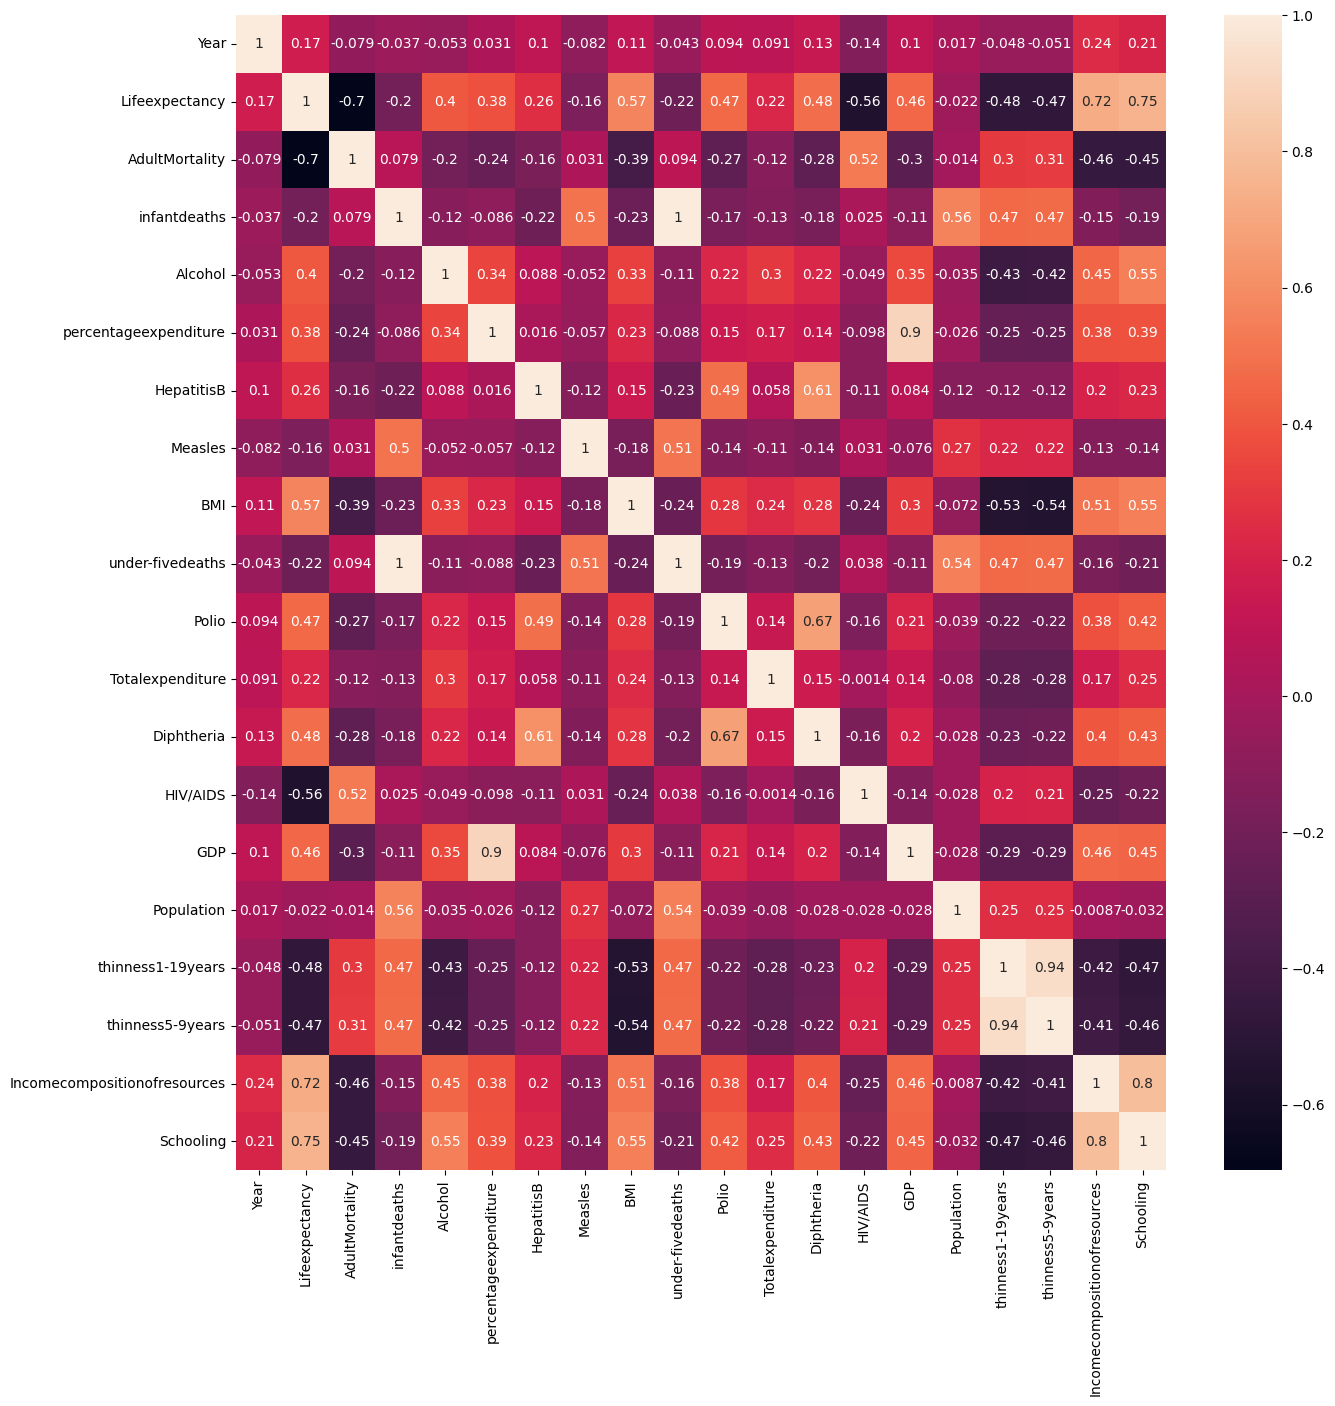

In [64]:
#correlation with heatmap to interpret the relation and multicolliniarity
s=df.select_dtypes(include='number').corr()
plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True)

In [65]:
df.drop(columns=['thinness5-9years','BMI','infantdeaths'], inplace=True)

In [66]:
to_remove = ['thinness5-9years','BMI','infantdeaths']

# Removing elements
for item in to_remove:
    if item in num_col:
        num_col.remove(item)

**Distribution of each feature using Histograms**

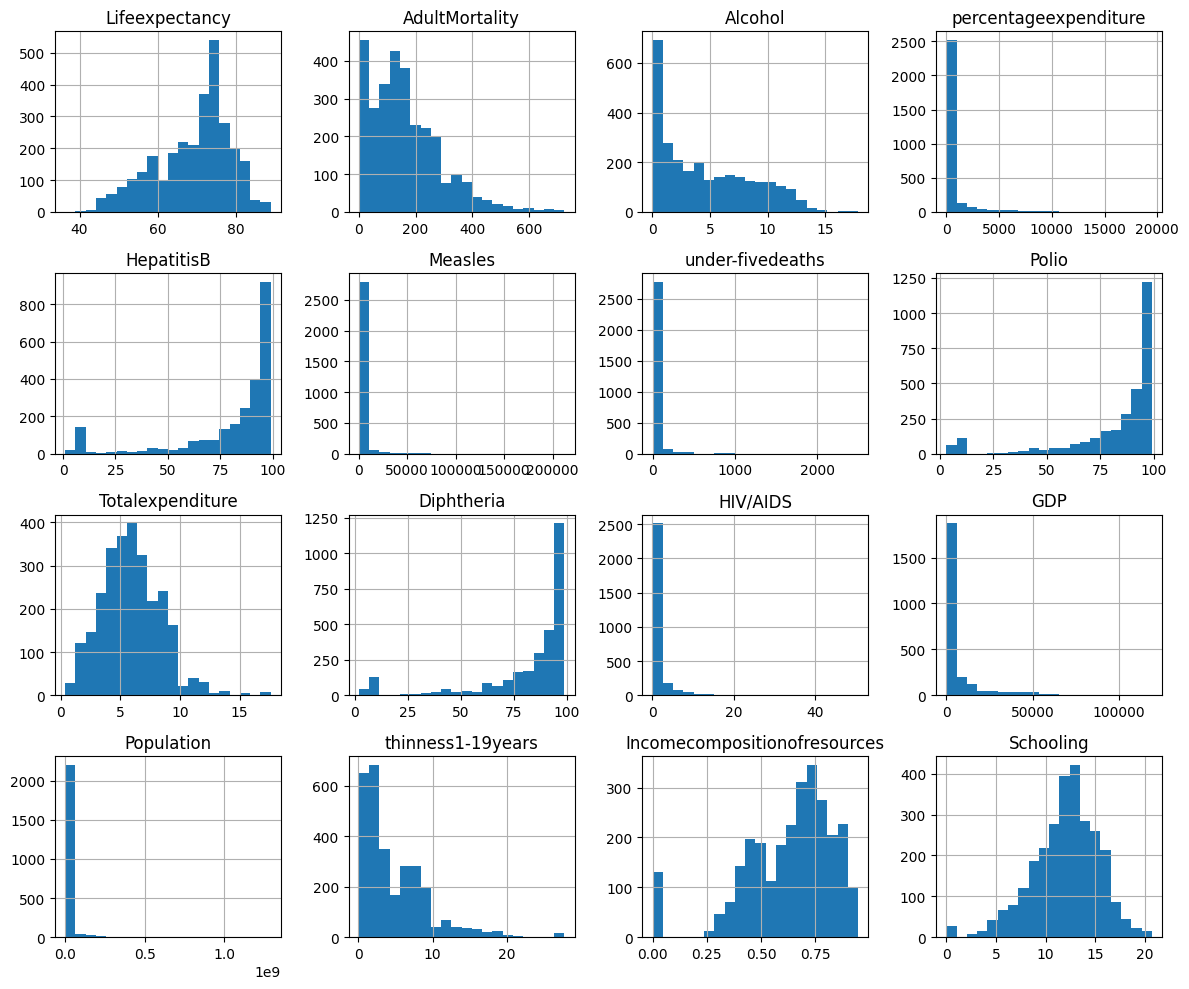

In [67]:
df[num_col].drop(columns=['Year']).hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

**Time Analysis of each feature**

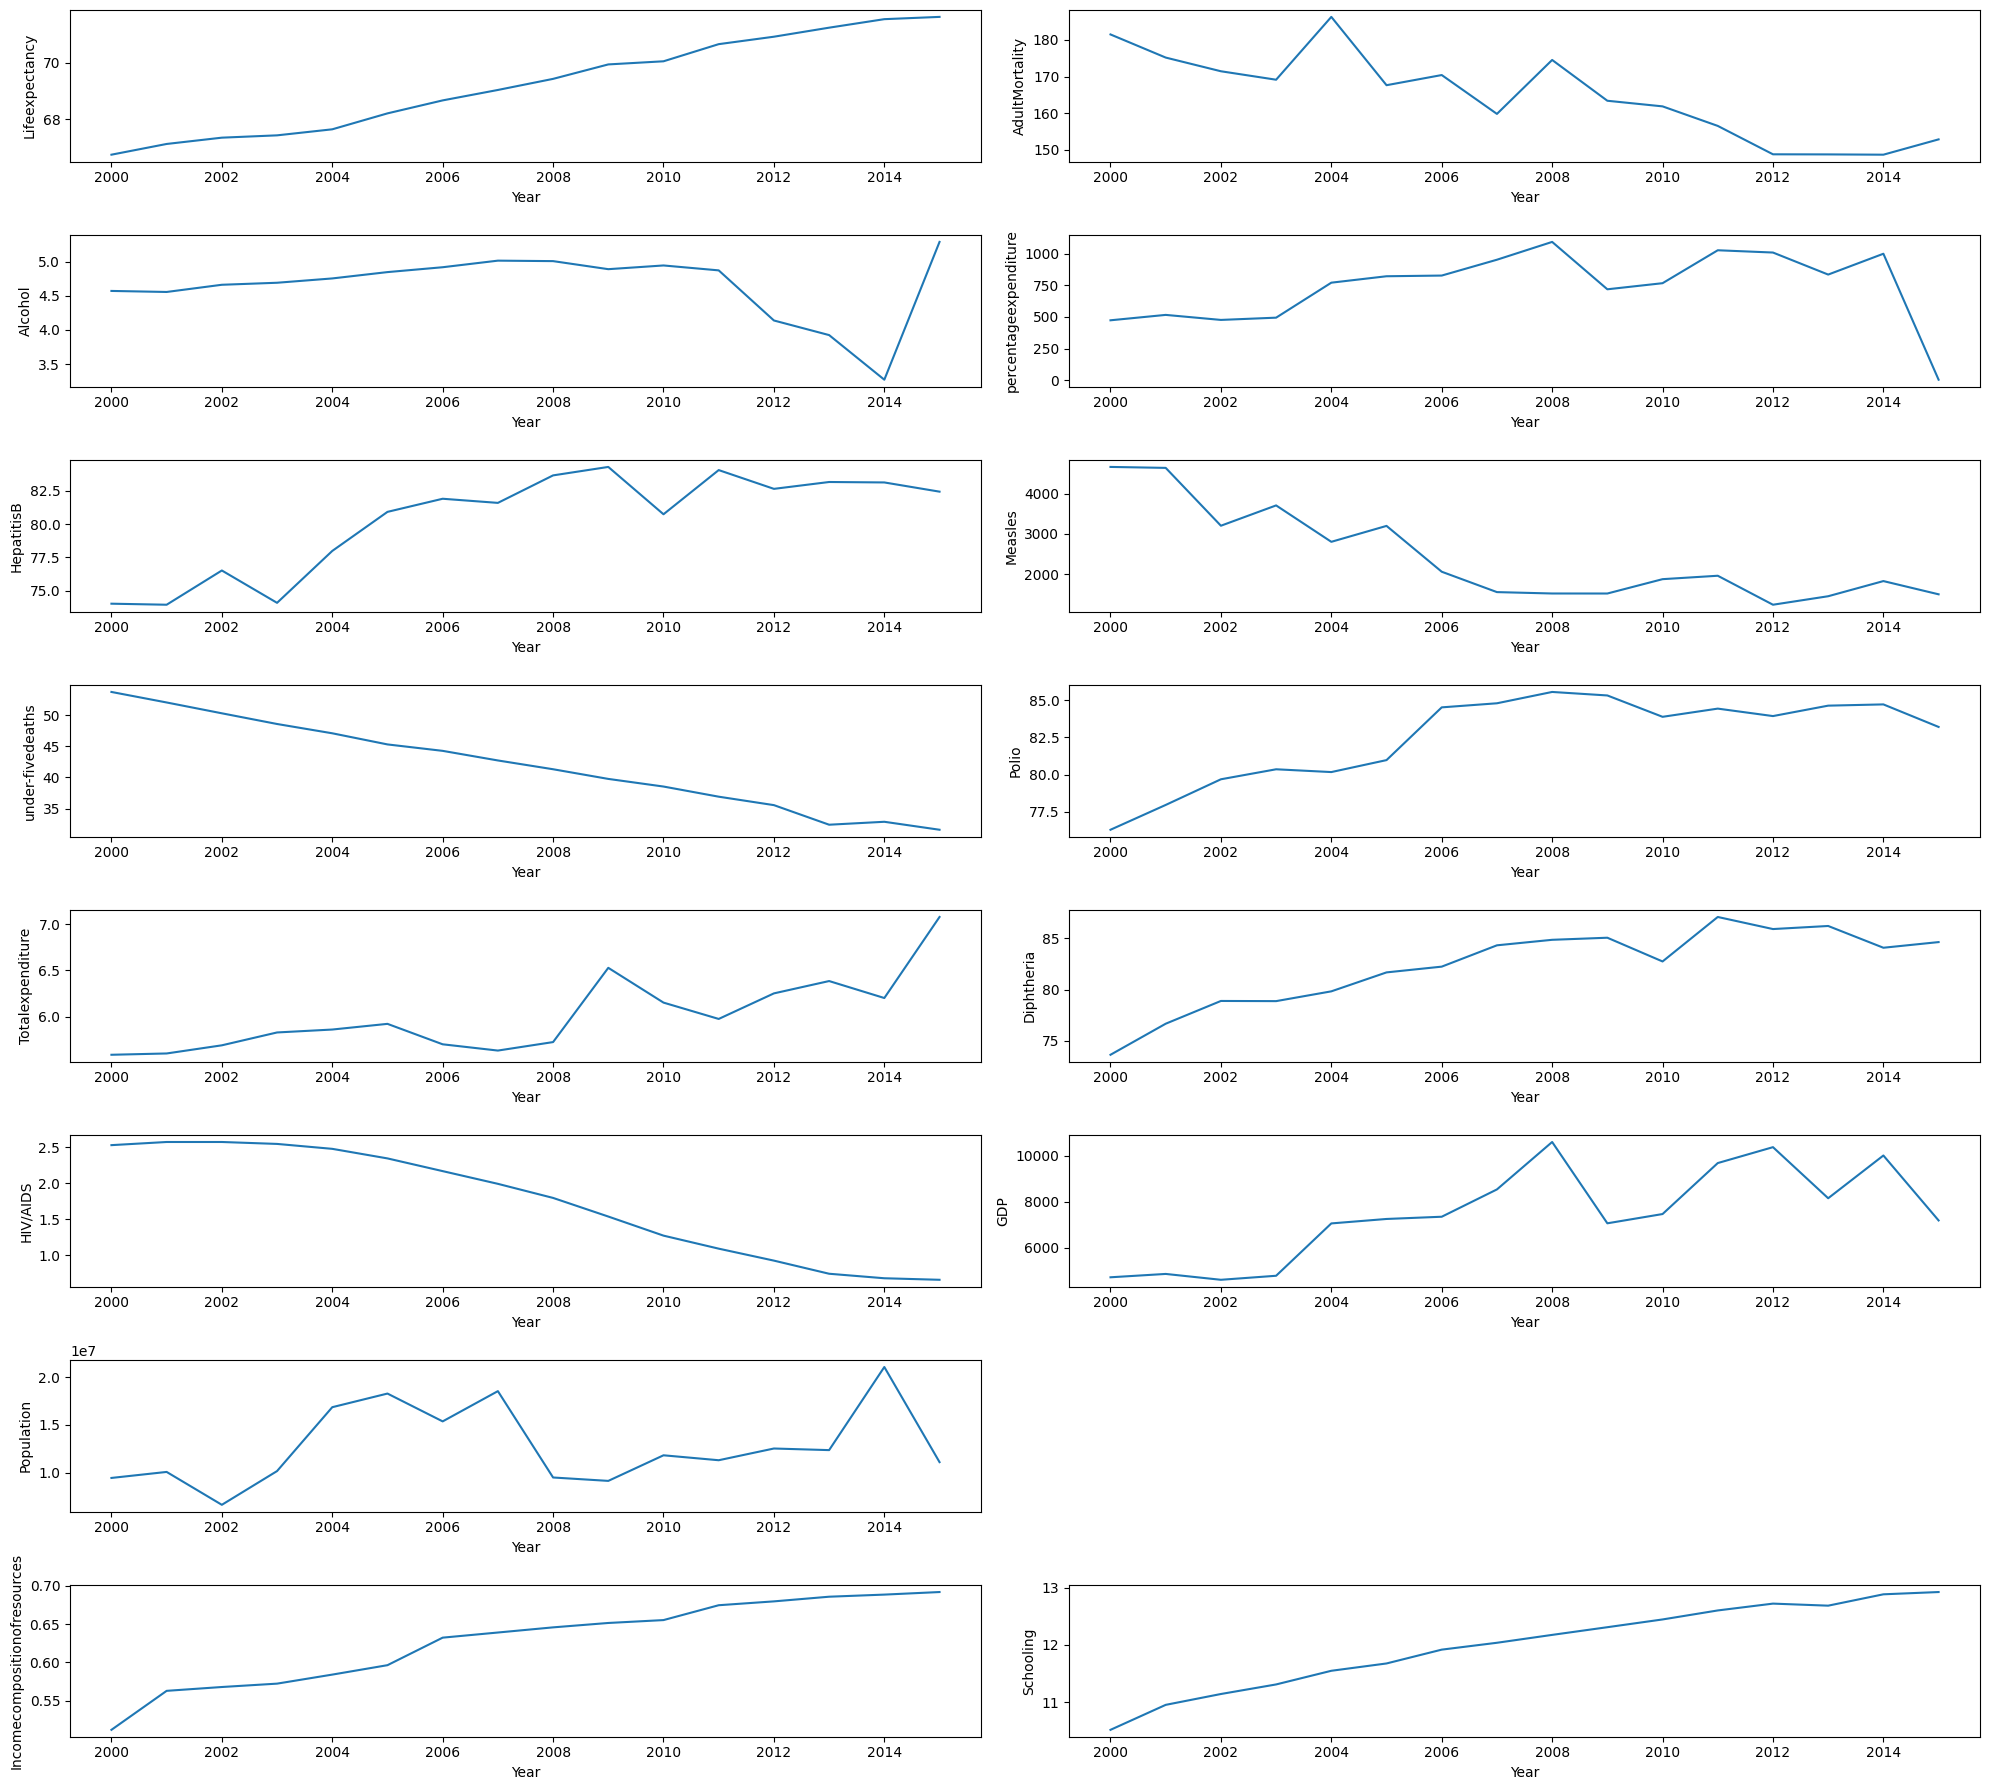

In [68]:
fig,axes=plt.subplots(nrows=len(df[num_col].columns)//2 ,ncols=2,figsize=(20,18))
for idx,col in enumerate(df[num_col].drop(columns='Year').columns):
    row_idx=idx//2
    col_idx=idx%2
    sns.lineplot(x='Year', y=df[col], data=df, ax=axes[row_idx, col_idx], markers=True, errorbar=None)
fig.delaxes(axes[6,1])
plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

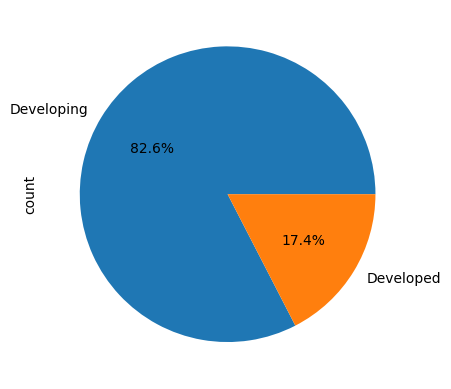

In [69]:
df['Status'].value_counts().plot.pie(autopct='%1.1f%%')

In [70]:
pip install pycountry-convert;

In [71]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2, convert_continent_code_to_continent_name
def map_country_to_continent(country_name):
    try:
        country_alpha2 = country_name_to_country_alpha2(country_name)
        continent_code = country_alpha2_to_continent_code(country_alpha2)
        continent = convert_continent_code_to_continent_name(continent_code)
        return continent
    except Exception as e:
        if str(e) == '"Invalid Country Alpha-2 code: \'TL\' "':
            continent = 'Asia'
            return continent

In [72]:
df['Country'] = df['Country'].replace('Republic of Korea', 'South Korea')
df['Continent'] = df['Country'].apply(map_country_to_continent)
df.drop(columns=['Country'], inplace=True)

In [73]:
df['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania', None], dtype=object)

<Axes: ylabel='count'>

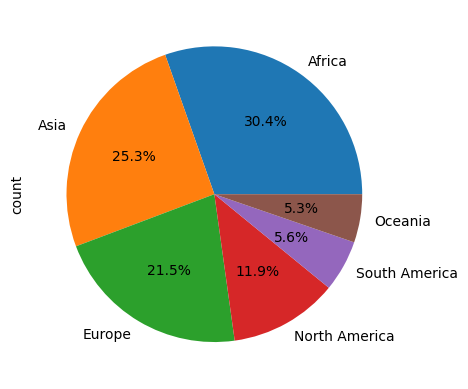

In [74]:
df['Continent'].value_counts().plot.pie(autopct='%1.1f%%')

**Split the dataframe**

In [75]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# **Pre-Processing**

### **Treating Categorical Features**

In [76]:
# encoding continent
continent_enc = LabelEncoder()
df_train['Continent'] = continent_enc.fit_transform(df_train['Continent'])
df_test['Continent'] = continent_enc.transform(df_test['Continent'])

# encoding year
year_enc = LabelEncoder()
df_train['Year'] = year_enc.fit_transform(df_train['Year'])
df_test['Year'] = year_enc.transform(df_test['Year'])

# encoding status
status_enc = LabelEncoder()
df_train['Status'] = status_enc.fit_transform(df_train['Status'])
df_test['Status'] = status_enc.transform(df_test['Status'])

In [77]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2350 entries, 456 to 860
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          2350 non-null   int64  
 1   Status                        2350 non-null   int64  
 2   Lifeexpectancy                2342 non-null   float64
 3   AdultMortality                2342 non-null   float64
 4   Alcohol                       2192 non-null   float64
 5   percentageexpenditure         2350 non-null   float64
 6   HepatitisB                    1911 non-null   float64
 7   Measles                       2350 non-null   int64  
 8   under-fivedeaths              2350 non-null   int64  
 9   Polio                         2336 non-null   float64
 10  Totalexpenditure              2165 non-null   float64
 11  Diphtheria                    2336 non-null   float64
 12  HIV/AIDS                      2350 non-null   float64
 13  GDP    

### **Treating Outliers**

In [78]:
#Outlier Equation
def outlier_threshold(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

#Outlier Percentage
def outlier_percentage(df, col):
    lower_bound, upper_bound = outlier_threshold(df, col)
    outliers = [x for x in df[col] if (x < lower_bound) or (x > upper_bound)]
    print(col)
    print("Outlier Percentage: ", len(outliers) / df[col].shape[0]*100, "%")
    print("---------------------------")

In [79]:
for col in df_train[num_col].drop(columns='Year').columns:
    outlier_percentage(df_train, col)

Lifeexpectancy
Outlier Percentage:  0.5957446808510638 %
---------------------------
AdultMortality
Outlier Percentage:  3.1914893617021276 %
---------------------------
Alcohol
Outlier Percentage:  0.0 %
---------------------------
percentageexpenditure
Outlier Percentage:  12.851063829787234 %
---------------------------
HepatitisB
Outlier Percentage:  8.382978723404255 %
---------------------------
Measles
Outlier Percentage:  18.425531914893618 %
---------------------------
under-fivedeaths
Outlier Percentage:  13.148936170212766 %
---------------------------
Polio
Outlier Percentage:  9.446808510638299 %
---------------------------
Totalexpenditure
Outlier Percentage:  1.148936170212766 %
---------------------------
Diphtheria
Outlier Percentage:  10.170212765957446 %
---------------------------
HIV/AIDS
Outlier Percentage:  18.382978723404257 %
---------------------------
GDP
Outlier Percentage:  12.042553191489363 %
---------------------------
Population
Outlier Percentage:  9.7

In [80]:
def replace_with_threshold(df_train, df_test, column):

    df_train[column] = df_train[column].astype('float64')
    df_test[column] = df_test[column].astype('float64')

    lower_bound, upper_bound = outlier_threshold(df_train, column)
    df_train.loc[df_train[column] < lower_bound, column] = lower_bound
    df_train.loc[df_train[column] > upper_bound, column] = upper_bound
    df_test.loc[df_test[column] < lower_bound, column] = lower_bound
    df_test.loc[df_test[column] > upper_bound, column] = upper_bound

for column in df_train[num_col].drop(columns='Year').columns:
    replace_with_threshold(df_train, df_test, column)

In [81]:
X_train, y_train = df_train.drop(columns=['Lifeexpectancy']), df_train['Lifeexpectancy']
X_test, y_test = df_test.drop(columns=['Lifeexpectancy']), df_test['Lifeexpectancy']

In [82]:
num_attributes = df_train[num_col].drop(columns=['Year','Lifeexpectancy']).columns
cat_attributes = ['Status', 'Continent', 'Year']

### **Pipelining**

In [83]:
num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent')
)

preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_attributes),
    ('cat', cat_pipeline, cat_attributes)
])

In [84]:
X_1 = pd.DataFrame(preprocessing.fit_transform(X_train))
X_1_test = pd.DataFrame(preprocessing.transform(X_test))

In [85]:
y_train.fillna(y_train.median(), inplace=True)
y_test.fillna(y_train.median(), inplace=True)

# **Model Training**

In [88]:
model_name = []
r2score = []
rmse = []
models = [
    LinearRegression(),
    RandomForestRegressor(random_state=42),
    DecisionTreeRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    ExtraTreesRegressor(random_state=42),
    AdaBoostRegressor(random_state=42),
    SVR(),
    XGBRegressor(random_state=42),
    XGBRFRegressor(random_state=42)
]

for model in models:
    model.fit(X_1, y_train)
    y_pred = model.predict(X_1_test)
    model_name.append(model.__class__.__name__)
    r2score.append(str(r2_score(y_test, y_pred)*100))
    rmse.append(str(math.sqrt(mean_squared_error(y_test, y_pred))))


In [92]:
models_df = pd.DataFrame({'Model Name': model_name, 'R2 Score': r2score, 'RMSE': rmse})
models_df = models_df.astype({'R2 Score': 'float64', 'RMSE': 'float64'})
models_df = models_df.sort_values(by='R2 Score', ascending=False)
models_df

,Model Name,R2 Score,RMSE
4,ExtraTreesRegressor,97.391487,1.502278
1,RandomForestRegressor,96.848247,1.651315
7,XGBRegressor,96.743543,1.678520
3,GradientBoostingRegressor,94.976808,2.084701
8,XGBRFRegressor,94.464450,2.188438
2,DecisionTreeRegressor,92.893109,2.479669
5,AdaBoostRegressor,90.109303,2.925279
6,SVR,87.354417,3.307679
0,LinearRegression,85.632671,3.525672


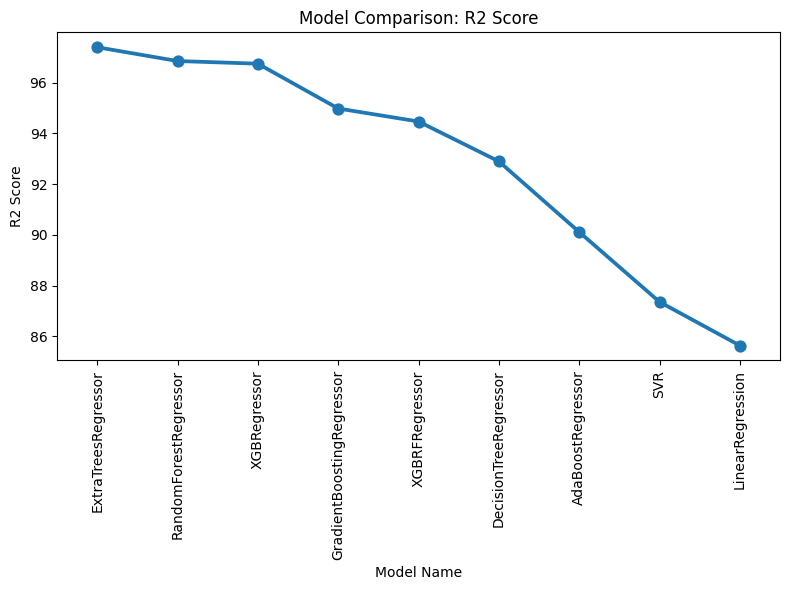

In [96]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model Name',y='R2 Score',data=models_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: R2 Score')
plt.tight_layout()
plt.show()

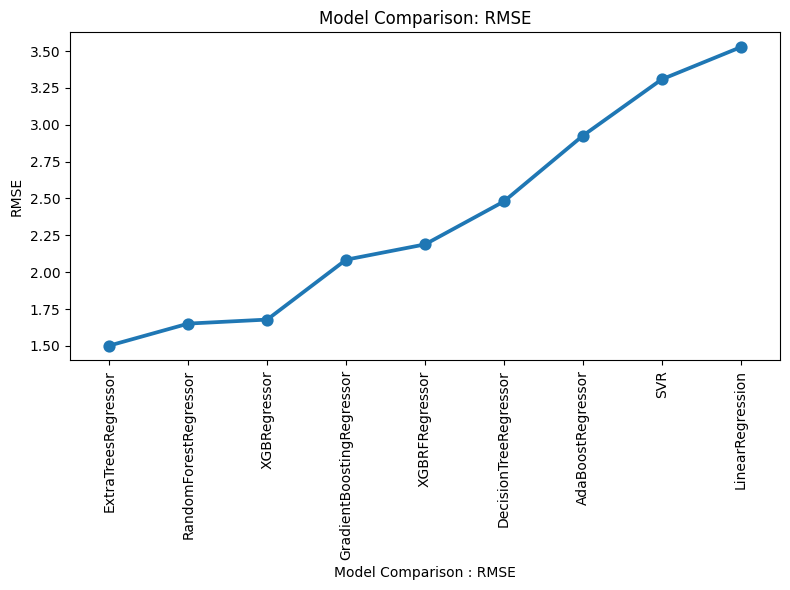

In [97]:
plt.figure(figsize=(8,6))
plt.xlabel('Model Comparison : RMSE')
sns.pointplot(x='Model Name',y='RMSE',data=models_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: RMSE')
plt.tight_layout()
plt.show()